<center><h1>INF-552 Lab 0</h1></center>
<br>
<center><font size="4">Introduction to Basic Development Tools</font></center>

### Rules

1. Please read the instructions and problem prompts **carefully**.
2. This lab is to give you some basic APIs of numpy, pandas and scikit-learn. Besides, some topics such as how to make your jupyter notebook be a more efficient developing tools, how to use git and GitHub will also be covered. The lab is to be done individually. You may talk to your fellow classmates about general issues ("Remind me again: Which API should I used for doing group by operation to a data set") but about the specifies of how to do these exercises.
3. Along with a similar vein, you can ask the TA for help, but ask questions about **concepts** but not ask the TA to help you debug your code. The TA is here to help, but not to do the work for you.
4. You are welcome to use the class resources and the Internet.
5. Playing with variations. Solve one problems, and then copy the code to a new cell and play around with it. Doing this is the single most important thing when learning programming.
6. This lab will not be graded but the content is highly related to your future programming assignments. So, treat it wisely.
7. All the content having been gone though in the week 1 discussion is just a snapshot of the most basic concepts. **You need to keep study more about Git, GitHub, Pandas, Numpy and Scikit-Learn in order to finish your programming assignments successfully.**
8. Have fun!

### Setup Development Environment

There are many ways to setup the environment. But, I do recommend a simple idea that is using the Anaconda, which is a pre-build python environment with bundles of useful packages.

**To download the Anaconda, go to the following website:
https://www.anaconda.com/distribution/**. Download the correct version based on your operating system and install it step by step.

Then, **configure your PATH environment variable** to make the conda command work. The following command is an easy way to test whether your configuration is correct. If it is, you will see something as like as the sample output.

> **command:**
>
> conda --version
>
> **sample output:**
>
> conda 4.6.12

**Finally, download this jupyter notebook file,** then change the working directory to where its location in terminal, and type the following command to open the jupter notebook and finish the lab.

> **command:** 
> jupyter notebook

### Google Collab

Google Colab is a great resource for any Machine Learning class. Follow the steps
in
https://colab.research.google.com/notebooks/intro.ipynb
to become more
familiar with Google Colab

### Pandas

#### Consider the Salaries.csv file.


#### Use the read_csv(...) method from Pandas to read data from file Salaries.csv and to copy it into a dataframe.

In [12]:
import pandas as pd
import numpy as np

In [13]:
data = pd.read_csv("./salaries.csv")


print(data.head())

   yearID teamID lgID   playerID  salary
0    1985    ATL   NL  barkele01  870000
1    1985    ATL   NL  bedrost01  550000
2    1985    ATL   NL  benedbr01  545000
3    1985    ATL   NL   campri01  633333
4    1985    ATL   NL  ceronri01  625000


#### Make the column playerID in the csv file as the index column and the first row as the header. Also, skip the second row when reading the file.

In [15]:
data = pd.read_csv("./salaries.csv", index_col = 'playerID', header=0, skiprows=[1])
print(data.head())

           yearID teamID lgID  salary
playerID                             
bedrost01    1985    ATL   NL  550000
benedbr01    1985    ATL   NL  545000
campri01     1985    ATL   NL  633333
ceronri01    1985    ATL   NL  625000
chambch01    1985    ATL   NL  800000


#### Select the id of the players who are registered in ATL and HOU whose salary is higher than one million.

In [17]:
filtered_data = data[data['teamID'].isin(['ATL', 'HOU']) & (data['salary'] > 1_000_000) ]
print(filtered_data.head())

           yearID teamID lgID   salary
playerID                              
hornebo01    1985    ATL   NL  1500000
murphda05    1985    ATL   NL  1625000
suttebr01    1985    ATL   NL  1354167
ryanno01     1985    HOU   NL  1350000
hornebo01    1986    ATL   NL  1800000


#### Use the describe() method to calculate the standard deviation, first quartile, median, third quartile, mean, maximum, and minimum of the salary in team ATL.

In [19]:
filtered_data[filtered_data['teamID'] == 'ATL']['salary'].describe()

count    3.250000e+02
mean     5.324481e+06
std      4.083713e+06
min      1.025000e+06
25%      2.000000e+06
50%      3.850000e+06
75%      7.666667e+06
max      1.606180e+07
Name: salary, dtype: float64

#### Create a Python dictionary object whose keys are the headers of the dataframe created in the read_csv() exercise and values are Python list objects that contain data corresponding to the headers. (Here, use the iterrows method to iterate each row of the dataframe and copy it to a dictionary. However, there is a easier way. Learn how the to_dict() method works by yourself later)

In [21]:
print(data.head(10))

           yearID teamID lgID   salary
playerID                              
bedrost01    1985    ATL   NL   550000
benedbr01    1985    ATL   NL   545000
campri01     1985    ATL   NL   633333
ceronri01    1985    ATL   NL   625000
chambch01    1985    ATL   NL   800000
dedmoje01    1985    ATL   NL   150000
forstte01    1985    ATL   NL   483333
garbege01    1985    ATL   NL   772000
harpete01    1985    ATL   NL   250000
hornebo01    1985    ATL   NL  1500000


In [22]:
my_dict = {header: [] for header in data.columns}

for _, row in data.iterrows():
    for column in data.columns:
        my_dict[column].append(row[column])


#### Create a dataframe using pd.DataFrameRead and from the dictionary created in (e). Then, change the header to "a", "b", "c", ...

In [24]:
my_dataframe = pd.DataFrame(my_dict)
my_dataframe.columns = ['a','b','c','d']

print(my_dataframe)

          a    b   c         d
0      1985  ATL  NL    550000
1      1985  ATL  NL    545000
2      1985  ATL  NL    633333
3      1985  ATL  NL    625000
4      1985  ATL  NL    800000
...     ...  ...  ..       ...
25569  2015  WAS  NL    512800
25570  2015  WAS  NL    507500
25571  2015  WAS  NL  21000000
25572  2015  WAS  NL  16500000
25573  2015  WAS  NL  14000000

[25574 rows x 4 columns]


### Numpy

Quick start: https://www.numpy.org/devdocs/user/quickstart.html

Numpy axes explaination: https://www.sharpsightlabs.com/blog/numpy-axes-explained/

The np.array Method
Example 1:

```python
ls = [1, 2, 3]
arr = np.array(ls)
```

Example 2:
```python
>>> np.array([[1, 2], [3, 4]])
array([[1, 2],
       [3, 4]])
```

#### Now, create a 2-dimensional Python list object, then convert it to a Numpy array object.

In [29]:
my_2d_list = [[1,3,5,7,9],[2,4,6,8,10],[-4,-6,-8,-10,-12]]
np_arr=np.array(my_2d_list)
print(np_arr)

[[  1   3   5   7   9]
 [  2   4   6   8  10]
 [ -4  -6  -8 -10 -12]]


#### Examine the ndim, shape, size, dtype, itemsize, and data attributes of the numpy array object

In [31]:
np_arr.ndim

2

In [32]:
np_arr.shape

(3, 5)

In [33]:
np_arr.size

15

In [34]:
np_arr.dtype

dtype('int64')

In [35]:
np_arr.itemsize

8

#### Learn the dimension concept of an ndarray object by using reshape() and flatten() methods.

In [37]:
np_arr.shape


(3, 5)

In [38]:
np_reshaped = np_arr.reshape(5,3)
np_reshaped

array([[  1,   3,   5],
       [  7,   9,   2],
       [  4,   6,   8],
       [ 10,  -4,  -6],
       [ -8, -10, -12]])

In [39]:
np_reshaped.shape


(5, 3)

In [40]:
np_reshaped.flatten()

array([  1,   3,   5,   7,   9,   2,   4,   6,   8,  10,  -4,  -6,  -8,
       -10, -12])

#### The Slice Operation of ndarray Objects

Understand how the slice operation works for 1-D array and 2-D array.

Example:

```python
>>> arr = np.array([[1, 2, 3], [3, 4, 6], [7, 8, 9]])
>>> arr[1:]
array([[3, 4, 6],
       [7, 8, 9]])
>>> arr[1:, 0:2]
array([[3, 4],
       [7, 8]])
```

In [43]:
np_arr

array([[  1,   3,   5,   7,   9],
       [  2,   4,   6,   8,  10],
       [ -4,  -6,  -8, -10, -12]])

In [44]:
np_arr[1:,1:4]

array([[  4,   6,   8],
       [ -6,  -8, -10]])

In [45]:
np_arr[:,:-2]

array([[ 1,  3,  5],
       [ 2,  4,  6],
       [-4, -6, -8]])

In [46]:
np_arr.flatten()[::2]

array([  1,   5,   9,   4,   8,  -4,  -8, -12])

#### Learn operations on ndarray by examining the argmin(), argmax(), min(), max(), mean(), sum(), std(), dot(), square(), sqrt(), abs(). exp(), sign(), and mod() methods. Make yourself comfortable with these methods

In [48]:
np.argmin(np_arr)

14

In [49]:
np.min(np_arr)

-12

In [50]:
np.argmax(np_arr)

9

In [51]:
np.max(np_arr)

10

In [52]:
np.mean(np_arr)

1.0

In [53]:
np.sum(np_arr)

15

In [54]:
np.std(np_arr)

6.97614984548545

In [55]:
ones = np.ones((5,5))
np.dot(np_arr,ones)

array([[ 25.,  25.,  25.,  25.,  25.],
       [ 30.,  30.,  30.,  30.,  30.],
       [-40., -40., -40., -40., -40.]])

In [56]:
np.square(np_arr)

array([[  1,   9,  25,  49,  81],
       [  4,  16,  36,  64, 100],
       [ 16,  36,  64, 100, 144]])

In [57]:
np.sqrt(np.abs(np_arr))

array([[1.        , 1.73205081, 2.23606798, 2.64575131, 3.        ],
       [1.41421356, 2.        , 2.44948974, 2.82842712, 3.16227766],
       [2.        , 2.44948974, 2.82842712, 3.16227766, 3.46410162]])

In [58]:
np.exp(np_arr)

array([[2.71828183e+00, 2.00855369e+01, 1.48413159e+02, 1.09663316e+03,
        8.10308393e+03],
       [7.38905610e+00, 5.45981500e+01, 4.03428793e+02, 2.98095799e+03,
        2.20264658e+04],
       [1.83156389e-02, 2.47875218e-03, 3.35462628e-04, 4.53999298e-05,
        6.14421235e-06]])

In [59]:
np.sign(np_arr)

array([[ 1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1],
       [-1, -1, -1, -1, -1]])

In [60]:
np_arr2 = [
    [1,3,2,4,5],[2,1,3,7,5],[3,5,2,1,4]
]

np.mod(np_arr,np_arr2)

array([[0, 0, 1, 3, 4],
       [0, 0, 0, 1, 0],
       [2, 4, 0, 0, 0]])

#### Examine the arange(), ones(), zeros(), eye(), linspace(), and concatenate() methods. Make yourself comfortable with these methods.

In [62]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [63]:
np.zeros((6,5),int)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [64]:
np.ones((6,5),float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [65]:
np.eye(6)

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [66]:
np.linspace(14, 25, num=15,endpoint=True, retstep=False, dtype=None, axis=0)

array([14.        , 14.78571429, 15.57142857, 16.35714286, 17.14285714,
       17.92857143, 18.71428571, 19.5       , 20.28571429, 21.07142857,
       21.85714286, 22.64285714, 23.42857143, 24.21428571, 25.        ])

In [67]:

np_arr

array([[  1,   3,   5,   7,   9],
       [  2,   4,   6,   8,  10],
       [ -4,  -6,  -8, -10, -12]])

In [68]:
ones = np.ones((3,5),int)
ones

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

In [69]:
np.concatenate((np_arr,ones), axis = 0)

array([[  1,   3,   5,   7,   9],
       [  2,   4,   6,   8,  10],
       [ -4,  -6,  -8, -10, -12],
       [  1,   1,   1,   1,   1],
       [  1,   1,   1,   1,   1],
       [  1,   1,   1,   1,   1]])

In [70]:
np.concatenate((np_arr,ones), axis = 1)

array([[  1,   3,   5,   7,   9,   1,   1,   1,   1,   1],
       [  2,   4,   6,   8,  10,   1,   1,   1,   1,   1],
       [ -4,  -6,  -8, -10, -12,   1,   1,   1,   1,   1]])

### Scikit-Learn

The followings are packages (or methods) in Python (Scikit-Learn and Scipy) that will be frequently used in your programming assignment. So, please read carefully.

- Data Preprocessing (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
    - Standardization: StandardScaler
    - Normalization: MinMaxScaler
    - Quantifing Categorical Features: LabelEncoder. OneHotEncoder
    - Construct Train and Test Set: model_selection.train_test_split
- KNN: KNeighborsClassifier
- Linear Regression: LinearRegression
- Logistic Regression: LogisticRegression, LogisticRegressionCV
- Feature Selection / Model Selection
    - L1 Penalized Regression (Lasso Regression) with Cross-Validation: LassoCV
    - L2 Penalized Regression (Ridge Regression) with Cross-Validation: RidgeCV
    - Cross-Validation: StratifiedKFold, RepeatedKFold, LeaveOneOut, KFold, model_selection.cross_validate, model_selection.cross_val_predict, model_selection.cross_val_score
    - Model Metrics (https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics): accuracy_score, auc, f1_score, hamming_loss, precision_score, recall_score, roc_auc_score
- Decision Tree: DecisionTreeClassifier, DecisionTreeRegressor
- Bootstrap, Ensemble Methods
    - Bootstrap: bootstrapped (https://pypi.org/project/bootstrapped/)
    - Bagging: RandomForestClassifier, RandomForestRegressor
    - Boosting: AdaBoostClassifier, AdaBoostRegressor
- Support Vector Machines (https://scikit-learn.org/stable/modules/svm.html#svm): LinearSVC, LinearSVR
- Multiclass and Multilabel Classification (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.multiclass)
    - One-vs-one Multiclass Strategy: OneVsOneClassifier
    - One-vs-the-rest (OvR) multiclass/multilabel strategy / OneVsRestClassifier
- Unsupervised Learning
    - K-means Clustering: KMeans
    - Hierarchical Clustering: scipy.cluster.hierarchy (not scikit-learn)
- Semisupervised Learning (https://scikit-learn.org/stable/modules/label_propagation.html)

### Matplotlib

**Quick start:** https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html

**Exercises:**

#### Create two one dimensional arrays x and y and plot y vs x, add title, xlabel, ylabel, grid.

In [76]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-3, 3, 10)
y = np.cos([j ** 2 for j in x])


In [77]:
print(x)

[-3.         -2.33333333 -1.66666667 -1.         -0.33333333  0.33333333
  1.          1.66666667  2.33333333  3.        ]


In [78]:
print(y)

[-0.91113026  0.6683999  -0.93454613  0.54030231  0.99383351  0.99383351
  0.54030231 -0.93454613  0.6683999  -0.91113026]


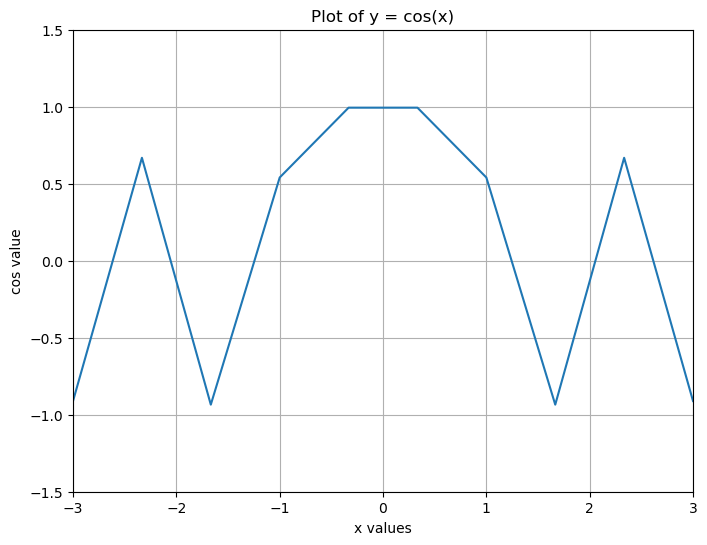

In [79]:
plt.figure(figsize=(8, 6)) 
plt.xlim(-3,3)
plt.ylim(-1.5,1.5)
plt.title('Plot of y = cos(x)') 
plt.xlabel('x values')  
plt.ylabel('cos value')  
plt.grid(True) 
plt.plot(x, y);

#### Create multiple arrays and plot them with different styles, add legends, add text/mathematical equations on the plot.

In [81]:
x = np.linspace(-3, 3, num=10)
same = np.array([j for j in x])
sin = np.array([np.sin(j) for j in x])
cos = np.array([np.cos(j) for j in x])

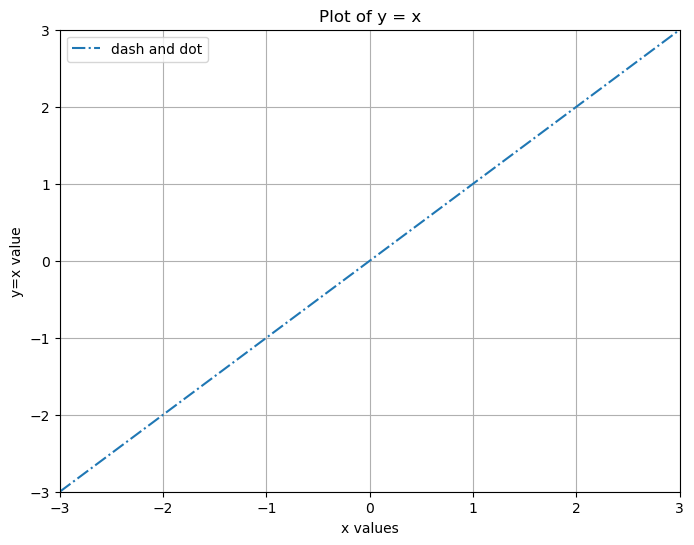

In [82]:
plt.figure(figsize=(8, 6)) 
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.title('Plot of y = x') 
plt.xlabel('x values')  
plt.ylabel('y=x value')  
plt.grid(True) 
plt.plot(x, same, linestyle='-.', label = 'dash and dot')
plt.legend()
plt.show();

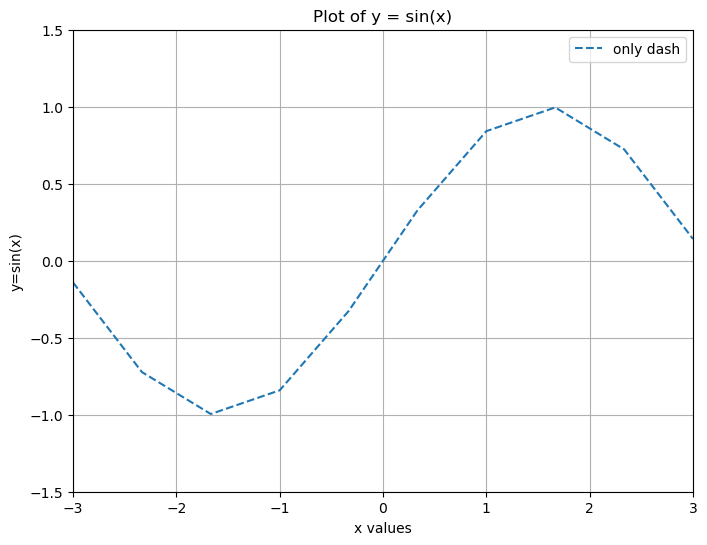

In [83]:
plt.figure(figsize=(8, 6)) 
plt.xlim(-3,3)
plt.ylim(-1.5,1.5)
plt.title('Plot of y = sin(x)') 
plt.xlabel('x values')  
plt.ylabel('y=sin(x)')  
plt.grid(True) 
plt.plot(x, sin, linestyle='--', label = 'only dash')
plt.legend()
plt.show();

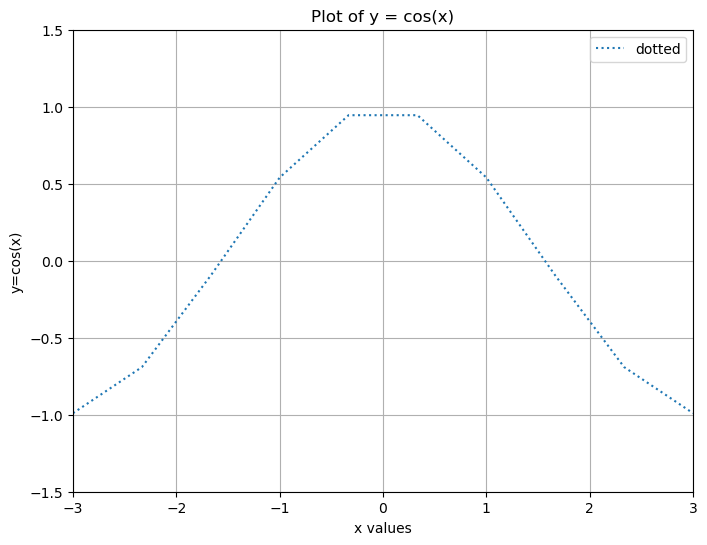

In [84]:
plt.figure(figsize=(8, 6)) 
plt.xlim(-3,3)
plt.ylim(-1.5,1.5)
plt.title('Plot of y = cos(x)') 
plt.xlabel('x values')  
plt.ylabel('y=cos(x)')  
plt.grid(True) 
plt.plot(x, cos, linestyle=':', label = "dotted")
plt.legend()
plt.show();

#### Create multiple subplots, play around with the figure size, text font/size.

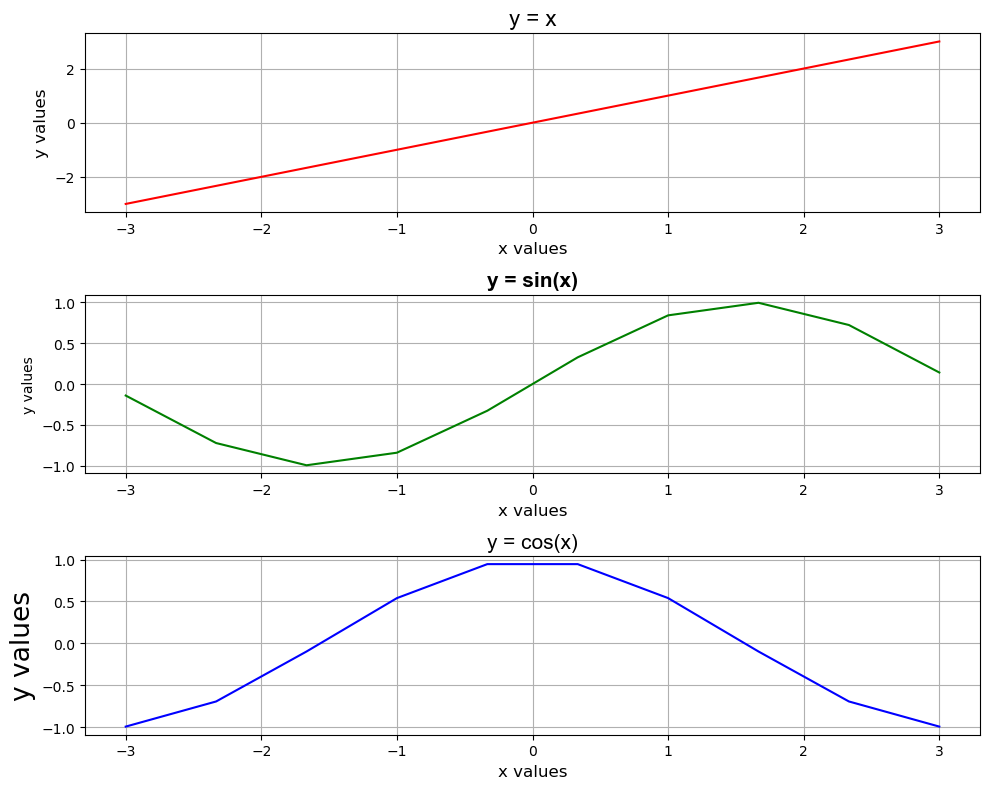

In [86]:
fig, axs = plt.subplots(3, figsize=(10, 8))

axs[0].plot(x, same, color='red')
axs[0].set_title('y = x', fontsize=16, family='Arial')  
axs[0].set_xlabel('x values', fontsize=12)
axs[0].set_ylabel('y values', fontsize=12)
axs[0].grid(True)


axs[1].plot(x, sin, color='green')
axs[1].set_title('y = sin(x)', fontsize=15, fontweight='bold', family='Arial')  
axs[1].set_xlabel('x values', fontsize=12)
axs[1].set_ylabel('y values', fontsize=10)
axs[1].grid(True)


axs[2].plot(x, cos, color='blue')
axs[2].set_title('y = cos(x)', fontsize=15, family='Arial')  # Title with custom font
axs[2].set_xlabel('x values', fontsize=12)
axs[2].set_ylabel('y values', fontsize=19)
axs[2].grid(True)
plt.tight_layout()
plt.show();

#### Get familiar with get current axis (gca) handle to do the above tasks

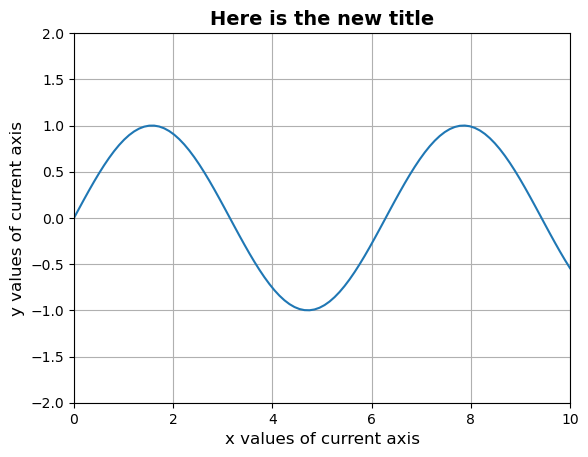

In [88]:
x = np.linspace(0, 10, 100)
y = np.sin(x)


plt.plot(x, y)


ax = plt.gca()


ax.set_xlim(0, 10)  
ax.set_ylim(-2, 2) 


ax.set_title('Here is the new title', fontsize=14, fontweight='bold')
ax.set_xlabel('x values of current axis', fontsize=12)
ax.set_ylabel('y values of current axis', fontsize=12)
ax.grid(True)


plt.show()

#### Change the limits on x and y axes, use logarithmic axes to plot.

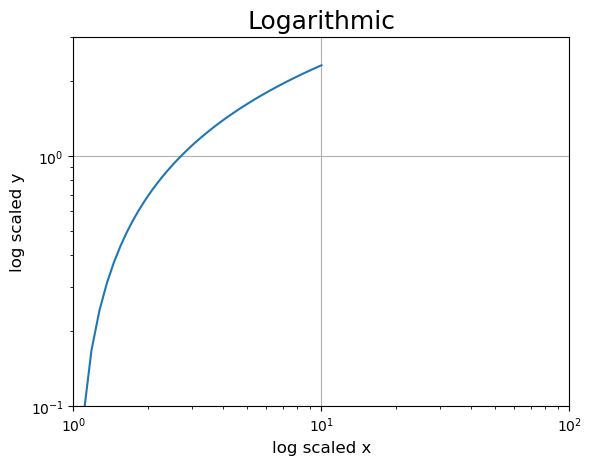

In [90]:

x = np.linspace(1, 10, 100)  
y = np.log(x)  


plt.plot(x, y)


ax = plt.gca()


ax.set_xscale('log') 
ax.set_yscale('log')  


ax.set_xlim(1, 100)  
ax.set_ylim(0.1, 3)  


ax.set_title('Logarithmic', fontsize=18)
ax.set_xlabel('log scaled x', fontsize=12)
ax.set_ylabel('log scaled y', fontsize=12)
ax.grid(True) 


plt.show()


### Pandas's DataFrame.plot and Seaborn

#### Pandas's DataFrame.plot

In [93]:
data = pd.read_csv("./salaries.csv")

print(data.head())

   yearID teamID lgID   playerID  salary
0    1985    ATL   NL  barkele01  870000
1    1985    ATL   NL  bedrost01  550000
2    1985    ATL   NL  benedbr01  545000
3    1985    ATL   NL   campri01  633333
4    1985    ATL   NL  ceronri01  625000


#### Create a dataframe and try to plot it with seaborn.

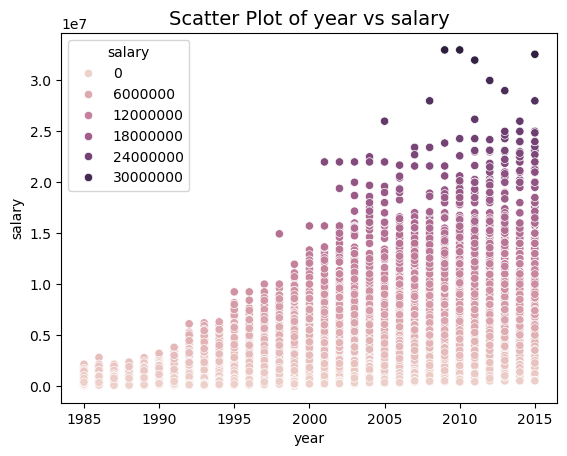

In [95]:
import seaborn as sns
df = pd.DataFrame(data)


sns.scatterplot(data=df, x=df['yearID'], y=df['salary'], hue='salary')


plt.title('Scatter Plot of year vs salary', fontsize=14)
plt.xlabel('year')
plt.ylabel('salary')


plt.show()


#### Perform statistical estimation on the data using seaborn in-built functions - lmplot, catplot, relpolt

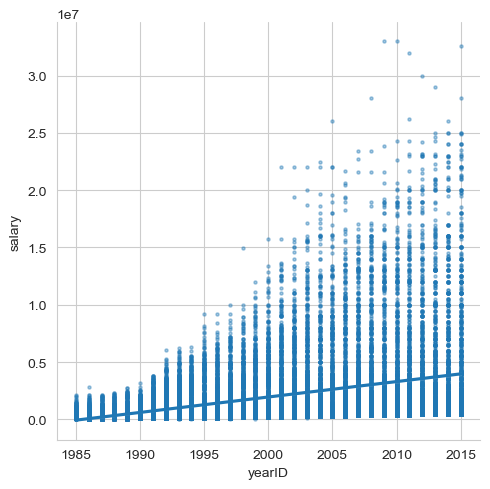

In [175]:
data = pd.read_csv("./salaries.csv")
salaries = pd.DataFrame(data)

sns.set_style("whitegrid")
sns.lmplot(data=salaries, x="yearID", y="salary", scatter_kws={"s": 5, "alpha": 0.4})

plt.show()

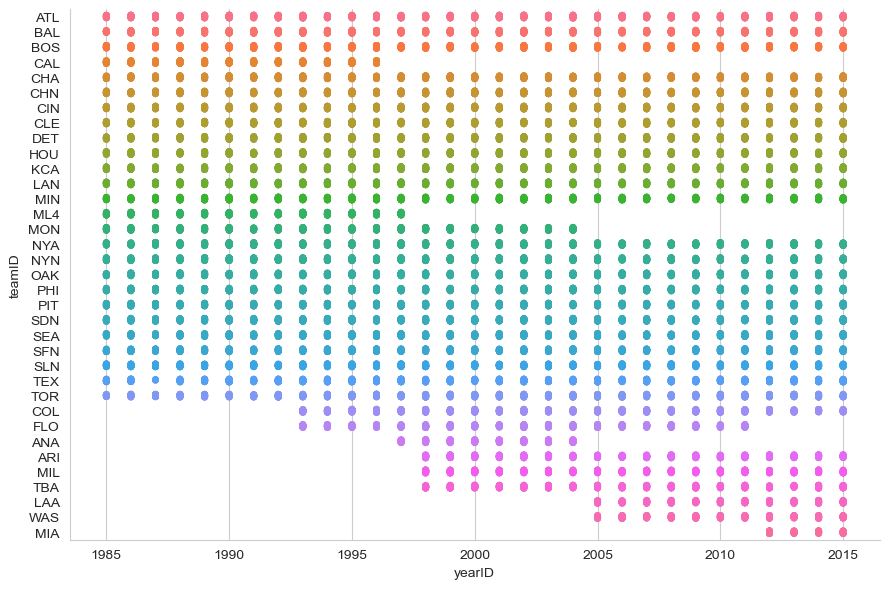

In [199]:
sns.catplot(
    data=salaries, 
    x="yearID", y="teamID",
    height=6, aspect=1.5, hue = 'teamID'
);

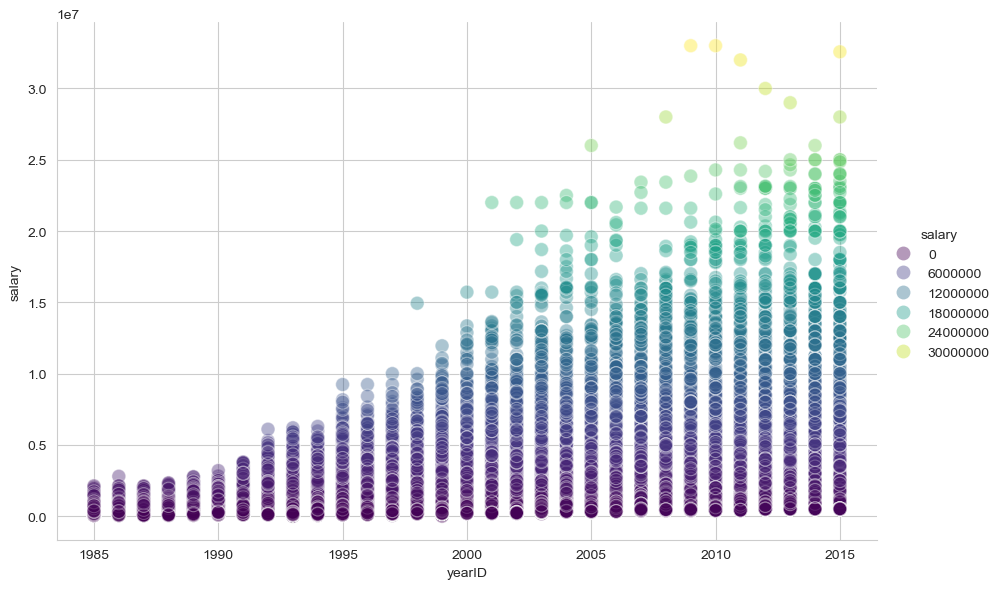

In [208]:
sns.relplot(
    data=salaries, 
    x="yearID", 
    y="salary", 
    hue="salary",  
    kind="scatter",  
    height=6, 
    aspect=1.5,
    palette="viridis",  
    s=100,  
    alpha=0.4
)

#### Create axis level functions like boxplot to visualize

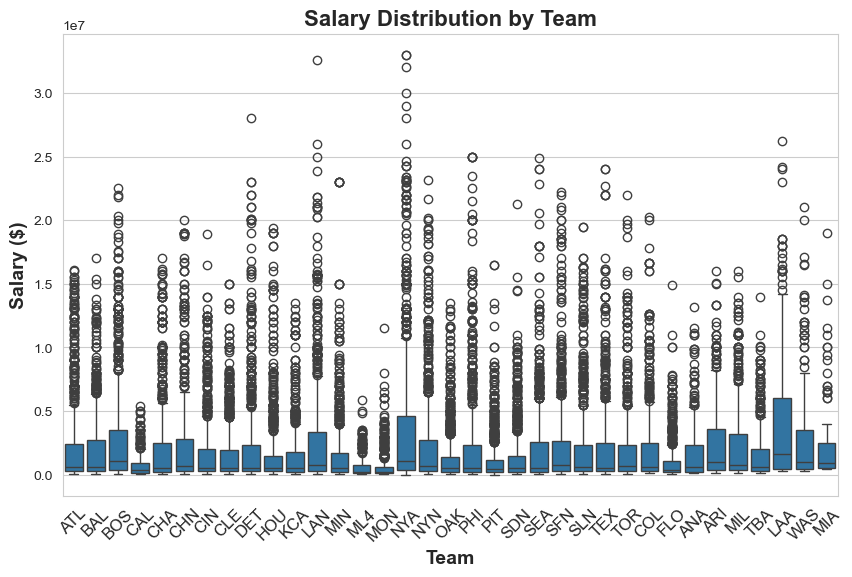

In [233]:




plt.figure(figsize=(10, 6))
sns.boxplot(data=salaries, x="teamID", y="salary")

plt.xticks(rotation=45, fontsize=12)  

plt.title("Salary Distribution by Team", fontsize=16, fontweight="bold")
plt.xlabel("Team", fontsize=14, fontweight="bold")
plt.ylabel("Salary ($)", fontsize=14, fontweight="bold")
plt.show()


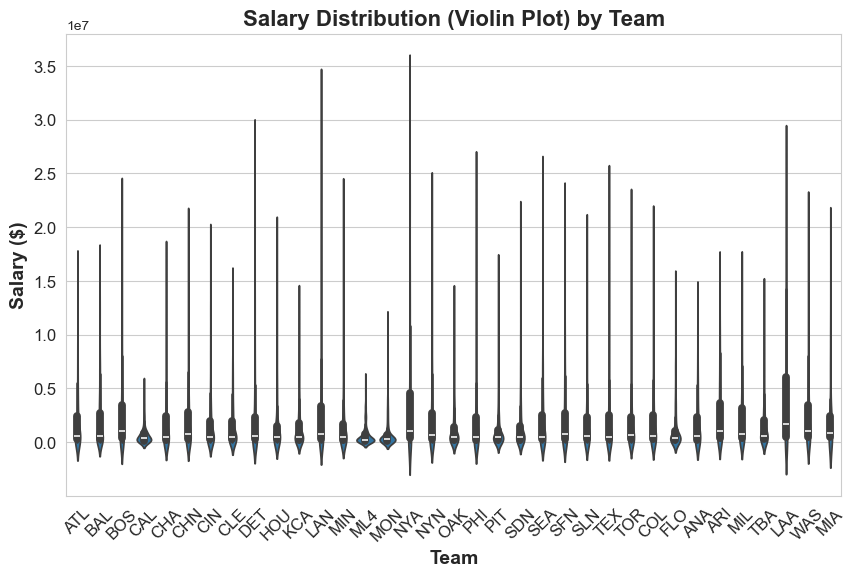

In [237]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=salaries, x="teamID", y="salary")


plt.title("Salary Distribution (Violin Plot) by Team", fontsize=16, fontweight="bold")
plt.xlabel("Team", fontsize=14, fontweight="bold")
plt.ylabel("Salary ($)", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)


plt.show()

#### Visualize the dataset structure using pairplot and jointplot.

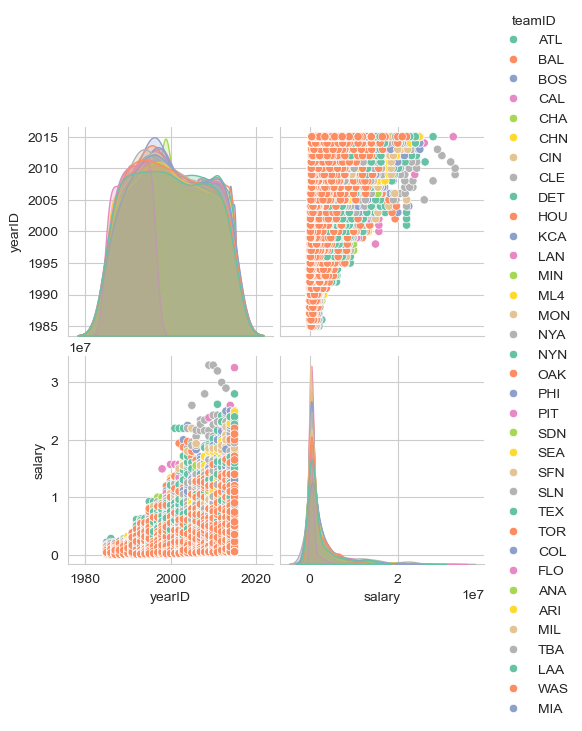

In [244]:
sns.pairplot(salaries, hue="teamID", palette="Set2", height=2.5);